# MNIST DATASET CLASSIFICATION USING SVM
Accuracy : 92% on test set and 90% on kaggle

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt,matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

## Loading the data
We use panda's read_csv to read train.csv into a dataframe.
Then we separate our images and labels for supervised learning.
We also do a train_test_split to break our data into two sets, one for training and one for testing. This let's us measure how well our model was trained by later inputting some known test data.
For the sake of time, I have only used 5000 images. You should increase or decrease this number to see how it affects model training.

In [4]:
labeled_images = pd.read_csv('mnist_train.csv')
images = labeled_images.iloc[0:5000,1:]
labels = labeled_images.iloc[0:5000,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)



/Users/ganesh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Viewing an Image
Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels)
Then, we plot the image and label with matplotlib


Text(0.5,1,'7')

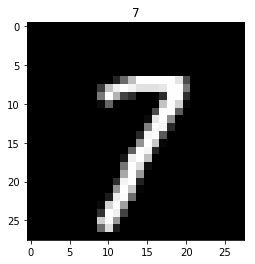

In [5]:
i=1
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

## Examining the Pixel Values
These images aren't actually black and white (0,1). They are gray-scale (0-255).
A histogram of this image's pixel values shows the range.

(array([ 694.,   12.,    5.,    4.,    6.,    5.,    3.,    7.,    9.,   39.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

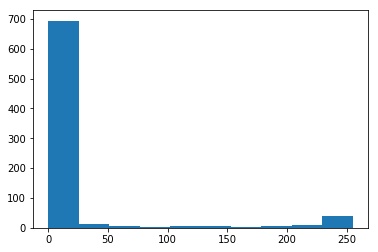

In [6]:
plt.hist(train_images.iloc[i])

## Training our model
First, we use the sklearn.svm module to create a vector classifier.
Next, we pass our training images and labels to the classifier's fit method, which trains our model.
Finally, the test images and labels are passed to the score method to see how well we trained our model. Fit will return a float between 0-1 indicating our accuracy on the test data set

In [8]:
clf = svm.SVC()
clf.fit(train_images,train_labels.values.ravel())
clf.score(test_images,test_labels)

0.104

/Users/ganesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ganesh/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2366: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/Users/ganesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Text(0.5,1,'5    7\nName: 3275, dtype: int64')

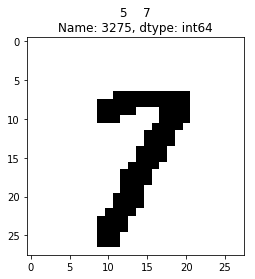

In [9]:
test_images[test_images>0]=1
train_images[train_images>0]=1

img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])

##  simplify our images by making them true black and white.
any pixel with a value simply becomes 1 and everything else remains 0.
We'll plot the same image again to see how it looks now that it's black and white. Look at the histogram now.

(array([ 685.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   99.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

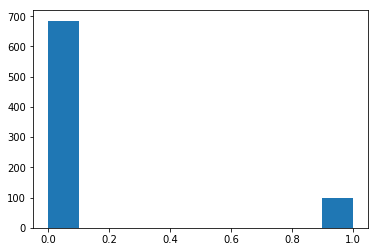

In [10]:
plt.hist(train_images.iloc[i])

## Retraining our model
We follow the same procedure as before, but now our training and test sets are black and white instead of gray-scale.  Score still isn't great, but it's a huge improvement.


In [11]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.92600000000000005

In [16]:
test_images.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Labelling the test data


In [23]:
test_data=pd.read_csv('/Users/ganesh/Downloads/test_1.csv')
test_data[test_data>0]=1
results=clf.predict(test_data[0:28000])

In [25]:
results.shape

(28000,)

## Generate CSV File

In [26]:
df = pd.DataFrame(results)
df.index+=1
df.index.name='ImageId'
df.columns=['Label']
df.to_csv('results.csv', header=True)